# Do videos posted in the evening get more views on average within 24 hours than videos posted in the morning?

H0:μ evening = μ morning=0.32
H1:μ evening > μ morning=0.32

Mean Morning Views: 1066.67
Mean Evening Views: 2600.00
Difference in Means: 1533.33
90% Confidence Interval: (1359.95, 1706.72)


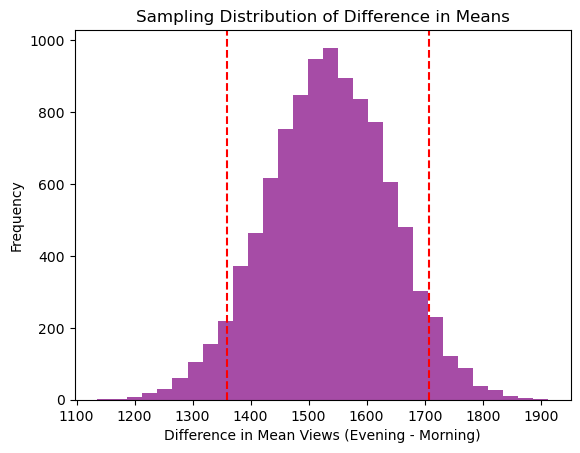

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example data: replace with your actual YouTube data
# Each row represents a video with its posting time and views after 24 hours
data = {
    'time_posted': ['morning', 'evening', 'morning', 'evening', 'morning', 'evening'],
    'views_24h': [1200, 2500, 900, 2700, 1100, 2600]
}

df = pd.DataFrame(data)

# Separate groups
morning = df[df['time_posted'] == 'morning']['views_24h']
evening = df[df['time_posted'] == 'evening']['views_24h']

# Calculate sample means
mean_morning = morning.mean()
mean_evening = evening.mean()

# Calculate margin of error (90% confidence)
confidence = 0.90
z_star = stats.norm.ppf(1 - (1 - confidence) / 2)
se_diff = np.sqrt(morning.var(ddof=1)/len(morning) + evening.var(ddof=1)/len(evening))
margin_error = z_star * se_diff

# Confidence interval for difference in means
diff_means = mean_evening - mean_morning
ci_lower = diff_means - margin_error
ci_upper = diff_means + margin_error

print(f"Mean Morning Views: {mean_morning:.2f}")
print(f"Mean Evening Views: {mean_evening:.2f}")
print(f"Difference in Means: {diff_means:.2f}")
print(f"90% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Visualize sampling distribution
samples = np.random.normal(diff_means, se_diff, 10000)
plt.hist(samples, bins=30, color='purple', alpha=0.7)
plt.axvline(ci_lower, color='red', linestyle='--')
plt.axvline(ci_upper, color='red', linestyle='--')
plt.title('Sampling Distribution of Difference in Means')
plt.xlabel('Difference in Mean Views (Evening - Morning)')
plt.ylabel('Frequency')
plt.show()